### ANNEXE II:
<br> - The annexe presents a primary statistic about the contents of the Pesticide Proprieties Database (PPDB). The files can be downloaded in mdb format covering 1994-2020 in the following link: https://www.ams.usda.gov/datasets/pdp/pdpdata. For the present doc, the years covering  2015-2020 are considered.
<br> - The statistic shows that the year 2015 is the one where the non-zeros values are the most important. For this purpose, the dataset `Results` has been retrieved.
<br> - As noticed in the file `02-EDA-jeromeaubry.ipynb`, the *.csv files from Kaggle are slightly different from the ones of the PPDB's database. Since these files act as look-up tables, a short analysis has been done to investigate if this impacts the main dataset and corrects accordingly.

**Table of contents**:
<br> 1. Define Functions
<br> 2. Retrieve Columns Name from Database 2015 - Kaggle
<br> 3.Analysis 2020-2015: Results & Samples database
>3.1 2020 Results
<br> 3.2 2019 Results
<br> 3.3 2018 Results
<br> 3.4 2017 Results
<br> 3.5 2016 Results
<br> 3.6 2015 Samples & Results

<br> 4. Cross check the dataset 2015 between Kaggle and PPDB database
>4.1 Main Dataset
<br> 4.2 *.csv File - Country

In [1]:
# Import librairies
import os

import pandas as pd
import numpy as np

import sqlite3

from tabulate import tabulate
import warnings

import matplotlib.pyplot as plt

### 1. Define Functions

In [2]:
'''
Take columns as dictionnary and map them to Samples and Results dataframe for adding
some informations
'''
def Replacedcolumns(df1, df2, col1, col2, col3):
    dict_df1 = {}
    dict_df1 =dict(zip(df1[col1], df1[col2]))
    col4 = col3 + ' Name'
    if col4 in df2:
        col4 = col3 + ' Name2'
        df2[col4]= df2[col3].map(dict_df1)
    else:    
        df2[col4]= df2[col3].map(dict_df1)
                                            
    return df2  

In [3]:
'''
Function for loading the text files (Samples and Results in respective folder
Add the appropriate columns names based on data from 2014
'''
def LoadData(secondpath, typeofdata):

    # Put in the header the appropriate column names
    if typeofdata =='Samples':
        cols = columns_Samples
    elif typeofdata =='Results':
        cols = columns_Results
    else:
        print('Choose typeofdata either "Samples" or "Results"')
            
    try:

        path_main = '/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/'
        all_path = os.path.join(path_main,secondpath)
        for dirpath, pathnames, filenames in os.walk(all_path):
            for file in filenames:
                valid_path = os.path.join(dirpath,file)

                if file.endswith('.txt'):
                    if typeofdata in file:
                        print(valid_path)
                        res = pd.read_csv(valid_path, sep='|',header=None)
                        res.set_axis(cols, axis=1, inplace=True) # Add columns from dataset 2015
                        res = pd.DataFrame(res)

                    else:
                        continue
                else:
                    continue
    except:
        print('No file with such a name')
        return []
    return res

In [4]:
# Display statistic of the preselected dataframe
def stat(df,typeofdata):
    
    #Select the appropriate type of data 
    if typeofdata == 'Samples':
        col = 'commod'
    elif typeofdata == 'Results':
        col = 'concen'
    else:
        print('Choose typeofdata either "Samples" or "Results"')
        
    # Go through the basic statistics    
    
    df.info()

    print('-'*50)
    print('Number of Os:', df.isin([0]).sum().sum())
    
    print('-'*50)
    print('Number of NANs:',df.isna().sum().sum())
    print('Number of values that are not NaNs in {} columns:{}'.format(col, len(df) - df[col].isna().sum()))
    
    print('-'*50)
    NANs_df = (100*df.isna().sum()/len(df)).to_frame().round(3)
    NANs_df.set_axis(['in %'],axis=1,inplace=True)
    print(tabulate(NANs_df.sort_values(by='in %', ascending=False).head(10)))
    print('-'*50)
    
    return df.describe()

### 2. Retrieve Columns Name from Database 2015 - Kaggle

In [5]:
# Work on main path 
path_main_2015_kaggle = '/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/'
path_secondary_2015_kaggle = 'US_Pesticide/2015PDPDatabase/Kaggle/'

path_total_2015_kaggle = os.path.join(path_main_2015_kaggle,path_secondary_2015_kaggle)
os.chdir(path_total_2015_kaggle)
os.getcwd()

'/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2015PDPDatabase/Kaggle'

In [6]:
# Retrieve the name of the tables in the *.sqlite format
db = sqlite3.connect('database.sqlite')
cursor = db.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row for row in cursor.fetchall()] 
cursor.close()
print('tables=',tables)

tables= [('sampledata15',), ('resultsdata15',)]


In [7]:
# Retrieve the tables
db = sqlite3.connect('database.sqlite')
cursor = db.cursor()
results_2015= pd.read_sql_query('SELECT * from resultsdata15',db)
samples_2015= pd.read_sql_query('SELECT * from sampledata15',db)

db.close()

In [8]:
# Retrieve the columns for results dataframe
columns_Results = results_2015.columns
columns_Results

Index(['sample_pk', 'commod', 'commtype', 'lab', 'pestcode', 'testclass',
       'concen', 'lod', 'conunit', 'confmethod', 'confmethod2', 'annotate',
       'quantitate', 'mean', 'extract', 'determin'],
      dtype='object')

In [9]:
# Retrieve the columns for samples dataframe
columns_Samples = samples_2015.columns
columns_Samples

Index(['sample_pk', 'state', 'year', 'month', 'day', 'site', 'commod',
       'source_id', 'variety', 'origin', 'country', 'disttype', 'commtype',
       'claim', 'quantity', 'growst', 'packst', 'distst'],
      dtype='object')

In [10]:
# Work on main path 
path_main_2015 = '/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/'
path_secondary_2015 = 'US_Pesticide/2015PDPDatabase/'

path_total_2015= os.path.join(path_main_2015,path_secondary_2015)
os.chdir(path_total_2015)
os.getcwd()

'/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2015PDPDatabase'

### 3.Analysis 2020-2015: Results & Samples database

#### 3.1 2020 Results

In [11]:
results20 = LoadData(secondpath='2020PDPDatabase', typeofdata='Results')
warnings.filterwarnings("ignore")
results20.head()

/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2020PDPDatabase/PDP20Results.txt


/Users/jeromeaubry/anaconda3/envs/exts-ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
0,3,AJ,RE,OH1,001,A,NaN,0.004,M,NaN,NaN,NaN,NaN,ND,805,35
1,3,AJ,RE,OH1,024,C,NaN,0.001,M,NaN,NaN,NaN,NaN,ND,805,52
2,3,AJ,RE,OH1,028,A,NaN,0.004,M,NaN,NaN,NaN,NaN,ND,805,35
3,3,AJ,RE,OH1,032,A,NaN,0.006,M,NaN,NaN,NaN,NaN,ND,805,52
4,3,AJ,RE,OH1,042,C,NaN,0.010,M,NaN,NaN,NaN,NaN,ND,805,52


In [12]:
stat(results20,'Results')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600379 entries, 0 to 2600378
Data columns (total 16 columns):
sample_pk      int64
commod         object
commtype       object
lab            object
pestcode       object
testclass      object
concen         float64
lod            float64
conunit        object
confmethod     object
confmethod2    float64
annotate       object
quantitate     object
mean           object
extract        int64
determin       int64
dtypes: float64(3), int64(3), object(10)
memory usage: 317.4+ MB
--------------------------------------------------
Number of Os: 0
--------------------------------------------------
Number of NANs: 12959685
Number of values that are not NaNs in concen columns:19679
--------------------------------------------------
-----------  -------
confmethod2  100
quantitate    99.988
annotate      99.903
concen        99.243
confmethod    99.243
sample_pk      0
commod         0
commtype       0
lab            0
pestcode       0
----------

,sample_pk,concen,lod,confmethod2,extract,determin
count,2.600379e+06,19679.000000,2.600379e+06,0.0,2600379.0,2.600379e+06
mean,5.587285e+03,0.058186,8.771612e-03,NaN,805.0,4.772773e+01
std,2.682648e+03,0.254741,1.987149e-02,NaN,0.0,1.155661e+01
min,1.000000e+00,0.001000,1.000000e-03,NaN,805.0,3.500000e+01
25%,3.617000e+03,0.004300,1.300000e-03,NaN,805.0,3.500000e+01
50%,5.810000e+03,0.011700,4.500000e-03,NaN,805.0,5.200000e+01
75%,7.997000e+03,0.037000,1.000000e-02,NaN,805.0,5.200000e+01
max,9.600000e+03,11.000000,5.000000e-01,NaN,805.0,8.000000e+01


#### 3.2 2019 Results

In [13]:
results19 = LoadData(secondpath='2019PDPDatabase', typeofdata='Results')
warnings.filterwarnings("ignore")
results19.head()

/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2019PDPDatabase/PDP19Results.txt


,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
0,1,AS,FR,WA1,001,A,NaN,0.0030,M,NaN,NaN,NaN,NaN,ND,805,35
1,1,AS,FR,WA1,024,C,NaN,0.0050,M,NaN,NaN,NaN,NaN,ND,805,52
2,1,AS,FR,WA1,028,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35
3,1,AS,FR,WA1,032,A,NaN,0.0015,M,NaN,NaN,NaN,NaN,ND,805,52
4,1,AS,FR,WA1,034,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35


In [14]:
stat(results19,'Results')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547508 entries, 0 to 2547507
Data columns (total 16 columns):
sample_pk      int64
commod         object
commtype       object
lab            object
pestcode       object
testclass      object
concen         float64
lod            float64
conunit        object
confmethod     object
confmethod2    float64
annotate       object
quantitate     object
mean           object
extract        int64
determin       int64
dtypes: float64(3), int64(3), object(10)
memory usage: 311.0+ MB
--------------------------------------------------
Number of Os: 0
--------------------------------------------------
Number of NANs: 12689750
Number of values that are not NaNs in concen columns:21479
--------------------------------------------------
-----------  -------
confmethod2  100
quantitate    99.983
annotate      99.827
concen        99.157
confmethod    99.157
sample_pk      0
commod         0
commtype       0
lab            0
pestcode       0
----------

,sample_pk,concen,lod,confmethod2,extract,determin
count,2.547508e+06,21479.000000,2.547508e+06,0.0,2547508.0,2.547508e+06
mean,5.229844e+03,0.205281,8.745681e-03,NaN,805.0,4.758137e+01
std,2.514581e+03,1.182510,1.780794e-02,NaN,0.0,1.167661e+01
min,1.000000e+00,0.001000,1.000000e-03,NaN,805.0,3.500000e+01
25%,3.407000e+03,0.005000,1.300000e-03,NaN,805.0,3.500000e+01
50%,5.228000e+03,0.015000,5.000000e-03,NaN,805.0,5.200000e+01
75%,7.179000e+03,0.058300,1.000000e-02,NaN,805.0,5.200000e+01
max,9.697000e+03,105.000000,4.000000e-01,NaN,805.0,8.000000e+01


#### 3.3 2018 Results

In [15]:
results18 = LoadData(secondpath='2018PDPDatabase', typeofdata='Results')
warnings.filterwarnings("ignore")
results18.head()

/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2018PDPDatabase/PDP18Results.txt


,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
0,1,AS,FR,WA1,001,A,NaN,0.0030,M,NaN,NaN,NaN,NaN,ND,805,35
1,1,AS,FR,WA1,024,C,NaN,0.0050,M,NaN,NaN,NaN,NaN,ND,805,64
2,1,AS,FR,WA1,028,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35
3,1,AS,FR,WA1,032,A,NaN,0.0015,M,NaN,NaN,NaN,NaN,ND,805,64
4,1,AS,FR,WA1,034,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35


In [16]:
stat(results18,'Results')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616117 entries, 0 to 2616116
Data columns (total 16 columns):
sample_pk      int64
commod         object
commtype       object
lab            object
pestcode       object
testclass      object
concen         float64
lod            float64
conunit        object
confmethod     object
confmethod2    float64
annotate       object
quantitate     object
mean           object
extract        int64
determin       int64
dtypes: float64(3), int64(3), object(10)
memory usage: 319.4+ MB
--------------------------------------------------
Number of Os: 0
--------------------------------------------------
Number of NANs: 13028723
Number of values that are not NaNs in concen columns:22784
--------------------------------------------------
-----------  -------
confmethod2  100
quantitate    99.981
annotate      99.779
concen        99.129
confmethod    99.129
sample_pk      0
commod         0
commtype       0
lab            0
pestcode       0
----------

,sample_pk,concen,lod,confmethod2,extract,determin
count,2.616117e+06,22784.000000,2.616117e+06,0.0,2.616117e+06,2.616117e+06
mean,5.557101e+03,0.109154,8.982209e-03,NaN,8.052706e+02,4.779037e+01
std,3.006778e+03,0.534172,1.886346e-02,NaN,1.856083e+00,1.187845e+01
min,1.000000e+00,0.001000,1.000000e-03,NaN,8.050000e+02,3.500000e+01
25%,3.130000e+03,0.003600,1.200000e-03,NaN,8.050000e+02,3.500000e+01
50%,5.552000e+03,0.011000,5.000000e-03,NaN,8.050000e+02,5.200000e+01
75%,8.014000e+03,0.038000,1.000000e-02,NaN,8.050000e+02,5.200000e+01
max,1.054500e+04,22.909500,5.000000e-01,NaN,8.180000e+02,8.000000e+01


#### 3.4 2017 Results

In [17]:
results17 = LoadData(secondpath='2017PDPDatabase', typeofdata='Results')
warnings.filterwarnings("ignore")
results17.head()

/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2017PDPDatabase/PDP17Results.txt


,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
0,1,AC,PU,WA1,001,A,NaN,0.0030,M,NaN,NaN,NaN,NaN,ND,805,35
1,1,AC,PU,WA1,024,C,NaN,0.0050,M,NaN,NaN,NaN,NaN,ND,805,52
2,1,AC,PU,WA1,028,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35
3,1,AC,PU,WA1,032,A,NaN,0.0015,M,NaN,NaN,NaN,NaN,ND,805,52
4,1,AC,PU,WA1,034,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35


In [18]:
stat(results17,'Results')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502346 entries, 0 to 2502345
Data columns (total 16 columns):
sample_pk      int64
commod         object
commtype       object
lab            object
pestcode       object
testclass      object
concen         float64
lod            float64
conunit        object
confmethod     object
confmethod2    float64
annotate       object
quantitate     object
mean           object
extract        int64
determin       int64
dtypes: float64(3), int64(3), object(10)
memory usage: 305.5+ MB
--------------------------------------------------
Number of Os: 0
--------------------------------------------------
Number of NANs: 12482774
Number of values that are not NaNs in concen columns:12934
--------------------------------------------------
-----------  -------
confmethod2  100
quantitate    99.987
annotate      99.89
concen        99.483
confmethod    99.483
sample_pk      0
commod         0
commtype       0
lab            0
pestcode       0
-----------

,sample_pk,concen,lod,confmethod2,extract,determin
count,2.502346e+06,12934.00000,2.502346e+06,0.0,2.502346e+06,2.502346e+06
mean,5.181763e+03,0.51166,9.998611e-01,NaN,8.106715e+02,4.690175e+01
std,2.837872e+03,5.30387,7.183728e+00,NaN,2.239240e+01,1.060436e+01
min,1.000000e+00,0.00100,1.000000e-03,NaN,8.050000e+02,7.000000e+00
25%,2.735000e+03,0.00500,2.400000e-03,NaN,8.050000e+02,3.500000e+01
50%,5.138000e+03,0.01660,5.000000e-03,NaN,8.050000e+02,5.200000e+01
75%,7.184000e+03,0.06200,1.000000e-02,NaN,8.050000e+02,5.200000e+01
max,1.054100e+04,153.00000,1.875000e+02,NaN,9.040000e+02,6.400000e+01


#### 3.5 2016 Results

In [19]:
results16 = LoadData(secondpath='2016PDPDatabase', typeofdata='Results')
warnings.filterwarnings("ignore")
results16.head()

/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2016PDPDatabase/PDP16Results.txt


,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
0,1,AC,PU,WA1,001,A,NaN,0.0030,M,NaN,NaN,NaN,NaN,ND,805,35
1,1,AC,PU,WA1,024,C,NaN,0.0050,M,NaN,NaN,NaN,NaN,ND,805,52
2,1,AC,PU,WA1,028,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35
3,1,AC,PU,WA1,032,A,NaN,0.0015,M,NaN,NaN,NaN,NaN,ND,805,52
4,1,AC,PU,WA1,034,A,NaN,0.0100,M,NaN,NaN,NaN,NaN,ND,805,35


In [20]:
stat(results16,'Results')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455487 entries, 0 to 2455486
Data columns (total 16 columns):
sample_pk      int64
commod         object
commtype       object
lab            object
pestcode       object
testclass      object
concen         float64
lod            float64
conunit        object
confmethod     object
confmethod2    float64
annotate       object
quantitate     object
mean           object
extract        int64
determin       int64
dtypes: float64(3), int64(3), object(10)
memory usage: 299.7+ MB
--------------------------------------------------
Number of Os: 0
--------------------------------------------------
Number of NANs: 12207027
Number of values that are not NaNs in concen columns:31981
--------------------------------------------------
-----------  -------
confmethod2  100
quantitate    99.934
annotate      99.803
concen        98.698
confmethod    98.698
sample_pk      0
commod         0
commtype       0
lab            0
pestcode       0
----------

,sample_pk,concen,lod,confmethod2,extract,determin
count,2.455487e+06,31981.000000,2.455487e+06,0.0,2.455487e+06,2.455487e+06
mean,5.391550e+03,0.223638,1.160551e-02,NaN,8.051855e+02,4.686007e+01
std,2.918536e+03,0.716336,2.707651e-02,NaN,1.541935e+00,1.123945e+01
min,1.000000e+00,0.001000,1.000000e-03,NaN,8.050000e+02,7.000000e+00
25%,3.013000e+03,0.007500,2.000000e-03,NaN,8.050000e+02,3.500000e+01
50%,5.351000e+03,0.025000,5.000000e-03,NaN,8.050000e+02,5.200000e+01
75%,8.104000e+03,0.103400,1.000000e-02,NaN,8.050000e+02,5.200000e+01
max,1.036500e+04,30.000000,5.000000e-01,NaN,8.180000e+02,7.200000e+01


#### 3.6 2015 Samples & Results

In [21]:
results15 = LoadData(secondpath='2015PDPDatabase', typeofdata='Results')
warnings.filterwarnings("ignore")
results15.head()

samples15 = LoadData(secondpath='2015PDPDatabase', typeofdata='Samples')
warnings.filterwarnings("ignore")
samples15.head()

/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2015PDPDatabase/PDP15Results.txt
/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2015PDPDatabase/PDP15Samples.txt


,sample_pk,state,year,month,day,site,commod,source_id,variety,origin,country,disttype,commtype,claim,quantity,growst,packst,distst
0,1,CA,15,1,20,10,AP,,Fuji,1,NaN,H,FR,NC,12.0,NaN,NaN,WA
1,2,CA,15,1,20,38,AP,,Red Delicious,1,NaN,T,FR,NC,12.0,NaN,WA,WA
2,3,CA,15,1,20,43,AP,,Red Delicious,1,NaN,T,FR,NC,NaN,NaN,WA,WA
3,4,CA,15,1,20,114,AP,,Granny Smith,1,NaN,H,FR,NC,17.0,NaN,WA,WA
4,5,CA,15,1,20,149,AP,,Fuji,1,NaN,D,FR,PO,10.0,NaN,NaN,CA


In [22]:
stat(results15,'Results')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333852 entries, 0 to 2333851
Data columns (total 16 columns):
sample_pk      int64
commod         object
commtype       object
lab            object
pestcode       object
testclass      object
concen         float64
lod            float64
conunit        object
confmethod     object
confmethod2    float64
annotate       object
quantitate     object
mean           object
extract        int64
determin       int64
dtypes: float64(3), int64(3), object(10)
memory usage: 284.9+ MB
--------------------------------------------------
Number of Os: 0
--------------------------------------------------
Number of NANs: 11584732
Number of values that are not NaNs in concen columns:38751
--------------------------------------------------
-----------  -------
confmethod2  100
quantitate    99.906
annotate      99.793
concen        98.34
confmethod    98.34
sample_pk      0
commod         0
commtype       0
lab            0
pestcode       0
----------- 

,sample_pk,concen,lod,confmethod2,extract,determin
count,2.333852e+06,38751.000000,2.333852e+06,0.0,2.333852e+06,2.333852e+06
mean,5.188241e+03,0.214600,1.325094e-02,NaN,8.051877e+02,4.640967e+01
std,3.017502e+03,0.623001,3.503971e-02,NaN,1.550940e+00,1.121763e+01
min,1.000000e+00,0.001000,1.000000e-03,NaN,8.050000e+02,7.000000e+00
25%,2.543000e+03,0.008700,2.500000e-03,NaN,8.050000e+02,3.500000e+01
50%,4.903000e+03,0.028000,5.000000e-03,NaN,8.050000e+02,5.200000e+01
75%,8.125000e+03,0.110000,1.000000e-02,NaN,8.050000e+02,5.200000e+01
max,1.018700e+04,16.000000,5.000000e-01,NaN,8.180000e+02,7.200000e+01


In [23]:
stat(results15,'Samples')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333852 entries, 0 to 2333851
Data columns (total 16 columns):
sample_pk      int64
commod         object
commtype       object
lab            object
pestcode       object
testclass      object
concen         float64
lod            float64
conunit        object
confmethod     object
confmethod2    float64
annotate       object
quantitate     object
mean           object
extract        int64
determin       int64
dtypes: float64(3), int64(3), object(10)
memory usage: 284.9+ MB
--------------------------------------------------
Number of Os: 0
--------------------------------------------------
Number of NANs: 11584732
Number of values that are not NaNs in commod columns:2333852
--------------------------------------------------
-----------  -------
confmethod2  100
quantitate    99.906
annotate      99.793
concen        98.34
confmethod    98.34
sample_pk      0
commod         0
commtype       0
lab            0
pestcode       0
----------

,sample_pk,concen,lod,confmethod2,extract,determin
count,2.333852e+06,38751.000000,2.333852e+06,0.0,2.333852e+06,2.333852e+06
mean,5.188241e+03,0.214600,1.325094e-02,NaN,8.051877e+02,4.640967e+01
std,3.017502e+03,0.623001,3.503971e-02,NaN,1.550940e+00,1.121763e+01
min,1.000000e+00,0.001000,1.000000e-03,NaN,8.050000e+02,7.000000e+00
25%,2.543000e+03,0.008700,2.500000e-03,NaN,8.050000e+02,3.500000e+01
50%,4.903000e+03,0.028000,5.000000e-03,NaN,8.050000e+02,5.200000e+01
75%,8.125000e+03,0.110000,1.000000e-02,NaN,8.050000e+02,5.200000e+01
max,1.018700e+04,16.000000,5.000000e-01,NaN,8.180000e+02,7.200000e+01


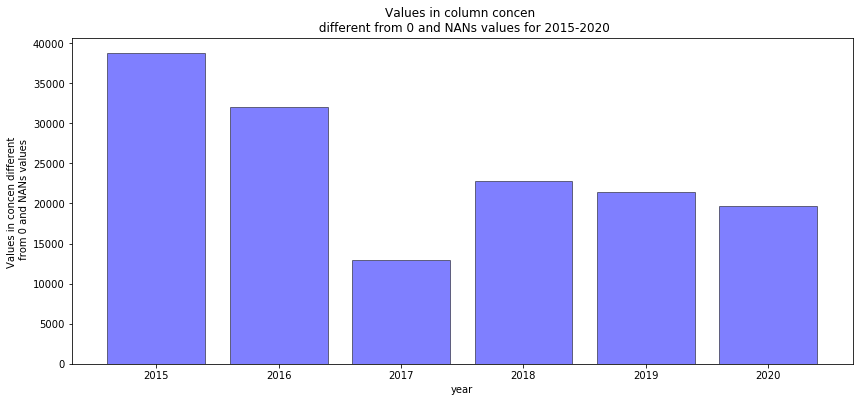

In [24]:
'''
Gather the values per year  that are no 0s, no NANs in column 'concen' of the dataset 'results'
Plot the results in bar plots
'''

data_gather = [results15, results16, results17, results18, results19, results20]
year = []
data =[]
offset = 2015
plt.figure(figsize=(14,6))

for i, item in enumerate(data_gather):
    item_year = i + offset
    year.append(item_year)
    data.append(len(item) - item['concen'].isna().sum())
    
    result = pd.DataFrame({'Year':year,
                      'values in concen': data
                           })  
    

plt.bar(result['Year'],result['values in concen'],color='b',edgecolor='black',alpha=0.5)

plt.title('Values in column concen \n different from 0 and NANs values for 2015-2020')
plt.xlabel('year')
plt.ylabel('Values in concen different \n from 0 and NANs values')
plt.show()

> Remark:
<br> - The year 2015 displays the highest values in column `concen`, **this is the reason why 2015 has been chosen as dataset** 

### 4.0 Cross check the dataset 2015 between Kaggle and PPDB database

#### 4.1 Main Dataset

In [25]:
# Cross check the columns between Kaggle, PPDB for results and samples
common_cols_results = np.intersect1d(results_2015.columns, results15.columns)
print(common_cols_results)

common_cols_samples = np.intersect1d(samples_2015.columns, samples15.columns)
print(common_cols_samples)

['annotate' 'commod' 'commtype' 'concen' 'confmethod' 'confmethod2'
 'conunit' 'determin' 'extract' 'lab' 'lod' 'mean' 'pestcode' 'quantitate'
 'sample_pk' 'testclass']
['claim' 'commod' 'commtype' 'country' 'day' 'distst' 'disttype' 'growst'
 'month' 'origin' 'packst' 'quantity' 'sample_pk' 'site' 'source_id'
 'state' 'variety' 'year']


In [26]:
print(results_2015.columns) # kaggle
print(results15.columns) # PPDB

Index(['sample_pk', 'commod', 'commtype', 'lab', 'pestcode', 'testclass',
       'concen', 'lod', 'conunit', 'confmethod', 'confmethod2', 'annotate',
       'quantitate', 'mean', 'extract', 'determin'],
      dtype='object')
Index(['sample_pk', 'commod', 'commtype', 'lab', 'pestcode', 'testclass',
       'concen', 'lod', 'conunit', 'confmethod', 'confmethod2', 'annotate',
       'quantitate', 'mean', 'extract', 'determin'],
      dtype='object')


In [27]:
print(samples_2015.columns)# kaggle
print(samples15.columns)# PPDB

Index(['sample_pk', 'state', 'year', 'month', 'day', 'site', 'commod',
       'source_id', 'variety', 'origin', 'country', 'disttype', 'commtype',
       'claim', 'quantity', 'growst', 'packst', 'distst'],
      dtype='object')
Index(['sample_pk', 'state', 'year', 'month', 'day', 'site', 'commod',
       'source_id', 'variety', 'origin', 'country', 'disttype', 'commtype',
       'claim', 'quantity', 'growst', 'packst', 'distst'],
      dtype='object')


In [28]:
# Both dataset are not identical 
print(results_2015.equals(results15))
print(samples_2015.equals(samples15))

False
False


In [29]:
# Investigation Results
results_together = []
for col in results_2015.columns:
    df_diff_results = pd.concat([results_2015[col],results15[col]]).drop_duplicates(keep=False)
    results_together.append(df_diff_results)
results_together = pd.DataFrame(results_together) 
results_together = results_together.T
results_together.head()

,sample_pk,commod,commtype,lab,pestcode,testclass,concen,lod,conunit,confmethod,confmethod2,annotate,quantitate,mean,extract,determin
781841,NaN,NaN,NaN,NaN,NaN,NaN,0.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787514,NaN,NaN,NaN,NaN,NaN,NaN,0.178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817255,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825760,NaN,NaN,NaN,NaN,NaN,NaN,0.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833906,NaN,NaN,NaN,NaN,NaN,NaN,0.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Remark**:
<br> - All the columns are identical expect the column `concen`, let's have a look at it

In [30]:
# Investigation of the column `concen`
#PPDB
results_PPDB = pd.DataFrame({'PPDB dataset':results15.loc[results_together.index ,'concen']})
#Kaggle
results_kaggle = pd.DataFrame({'kaggle dataset':results_2015.loc[results_together.index ,'concen',]})

results_missmatch = pd.concat([results_PPDB,results_kaggle],axis=1) # concatenate both columns into one
print('length of the mismatch in column concen:{}'.format(len(results_missmatch)))
print('length of the mismatch in column concen:{}%'.format(round(100*len(results_missmatch)/len(results_2015),3)))
results_missmatch

length of the mismatch in column concen:52
length of the mismatch in column concen:0.002%


,PPDB dataset,kaggle dataset
781841,NaN,0.351
787514,NaN,0.178
817255,NaN,0.118
825760,NaN,0.224
833906,NaN,0.103
834272,NaN,0.234
1419656,NaN,0.279
1429105,NaN,0.673
1430634,NaN,0.678
1434875,NaN,0.411


> **Remark**:
<br> - There is an offset in terms of index between boths `results` dataset, shifting 25 values representing <0.02% of the dataset, let's assume that it is negligeable and that the data from kaggle and PPDB are similar!

In [31]:
# Investigation Samples
samples_together = []
for col in samples_2015.columns:
    df_diff_samples = pd.concat([samples_2015[col],samples15[col]]).drop_duplicates(keep=False)
    samples_together.append(df_diff_samples)
samples_together

[Series([], Name: sample_pk, dtype: int64),
 Series([], Name: state, dtype: object),
 Series([], Name: year, dtype: object),
 Series([], Name: month, dtype: object),
 Series([], Name: day, dtype: object),
 74       0367
 750      0429
 1550     0612
 2131     0236
 2150     0148
 2153     0271
 2433     0641
 2440     0453
 2690     0585
 2691     0586
 2708     0505
 2716     0523
 2720     0509
 3954     0583
 3979     0582
 5640     0605
 5642     0607
 5648     0328
 5661     0554
 5813     0119
 7122     0219
 8543     0637
 9219     0228
 10009    0502
 10012    0541
 10043    0247
 10069    0147
 74        367
 750       429
 1550      612
 2131      236
 2150      148
 2153      271
 2433      641
 2440      453
 2690      585
 2691      586
 2708      505
 2716      523
 2720      509
 3954      583
 3979      582
 5640      605
 5642      607
 5648      328
 5661      554
 5813      119
 7122      219
 8543      637
 9219      228
 10009     502
 10012     541
 10043     247


> **Remark**:
<br> - There is some missmatches in column `site` between both `samples` dataset, a factor 100 between 20-30 values,let's assume that it is negligeable and the analysis in the file `02.EDA-jeroemaubry.ipynb` takes into account the right data

#### 4.2 *.csv File - Country

In [32]:
# Missing information in country.csv from Kapple database
# Retrieve the info via the excel sheets 

path_main = '/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/'

country_code = []
country_name = []
for dirpath, pathnames, filenames in os.walk(path_main):
    for file in filenames:
        
        if ('PDP ReferenceTables') and (file.endswith('2020.xls')):
            valid_path = os.path.join(dirpath,file)
            print(valid_path)
            res = pd.read_excel(valid_path, sheet_name='Country', header=3)
            res = pd.DataFrame(res)
            result= res.loc[(res['Country Code']=='160') | (res['Country Code']=='480') |
                            (res['Country Code']=='630') |(res['Country Code']=='801'),]
#            result=pd.Series(result['Country Name'])
            
            country_code.append(pd.Series(result['Country Code']))
            country_code = pd.DataFrame(country_code)

            country_name.append(pd.Series(result['Country Name']))
            country_name = pd.DataFrame(country_name)
            together = pd.concat([country_code,country_name], axis=0)


together = together.T
together

/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2020PDPDatabase/PDP ReferenceTables 2020.xls


,Country Code,Country Name
1,160,Australia
16,480,Italy
20,630,Netherlands
25,801,South Africa


>**Remark**: 
<br>- These 4 countries were missing in the csv file `country.csv`, extended now in `country_codes_extende.csv`
